<a href="https://colab.research.google.com/github/Bhandari007/recommendation_system/blob/main/recommender_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exporatory Data Analysis on Online Course Enrollment Data

We always need to take a look at data first since it is essence of many machine learning system. We need to explore what kind of data we will need and what such data would look like.

### Objectives:

* Identify keywords in course titles using a WordCloud.
* Calculate the summary statistics and visualizations of the online course content dataset.
* Determine popular couse genre
* Calculate the summary stastics and create visualizations of the online course enrollment dataset
* Identify courses with the greatest number of enrolled students.

# Packages

In [70]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [72]:
# Set random state
rs = 123

# Load and explore the dataset
Lets' load the datasets as `Pandas` dataframes and start some basic exporatory data analysis tasks on them.

In [73]:
# Point to the datasets stored on the cloud
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/ratings.csv"

In [74]:
course_df = pd.read_csv(course_genre_url)
ratings_df = pd.read_csv(ratings_url)  

In [75]:
course_df.columns

Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')

In [76]:
course_df.shape[0]

307

In [77]:
course_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [78]:
course_df.dtypes

COURSE_ID          object
TITLE              object
Database            int64
Python              int64
CloudComputing      int64
DataAnalysis        int64
Containers          int64
MachineLearning     int64
ComputerVision      int64
DataScience         int64
BigData             int64
Chatbot             int64
R                   int64
BackendDev          int64
FrontendDev         int64
Blockchain          int64
dtype: object

In [79]:
course_df.iloc[1,]

COURSE_ID                                     ML0122EN
TITLE              accelerating deep learning with gpu
Database                                             0
Python                                               1
CloudComputing                                       0
DataAnalysis                                         0
Containers                                           0
MachineLearning                                      1
ComputerVision                                       0
DataScience                                          1
BigData                                              0
Chatbot                                              0
R                                                    0
BackendDev                                           0
FrontendDev                                          0
Blockchain                                           0
Name: 1, dtype: object

# Plot a Word Cloud from Course Titles

In [80]:
titles = " ".join(title for title in course_df["TITLE"].astype(str))

In [81]:
titles

'robots are coming  build iot apps with watson  swift  and node red accelerating deep learning with gpu consuming restful services using the reactive jax rs client analyzing big data in r using apache spark containerizing  packaging  and running a spring boot application cloud native security conference  data security data science bootcamp with r for university proffesors learn how to use docker containers for iterative development scorm test course create your first mongodb database testing microservices with the arquillian managed container cloud pak for integration essentials watson analytics for social media data science bootcamp with python for university professors  advance create a cryptocurrency trading algorithm in python data   ai essentials securing java microservices with eclipse microprofile json web token  microprofile jwt  enabling distributed tracing in microservices with zipkin sql access for hadoop ybrid cloud conference  ai pipelines lab dataops methodology data   ai

We will now filter common stop words and some less meaningful words:

In [82]:
# English Stopwords
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])

Now creating `WordCloud` object and generate `wordcloud` from the titles

In [83]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width = 800, height=400)

In [84]:
wordcloud.generate(titles)

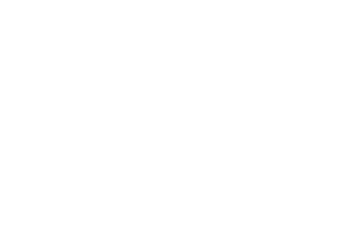

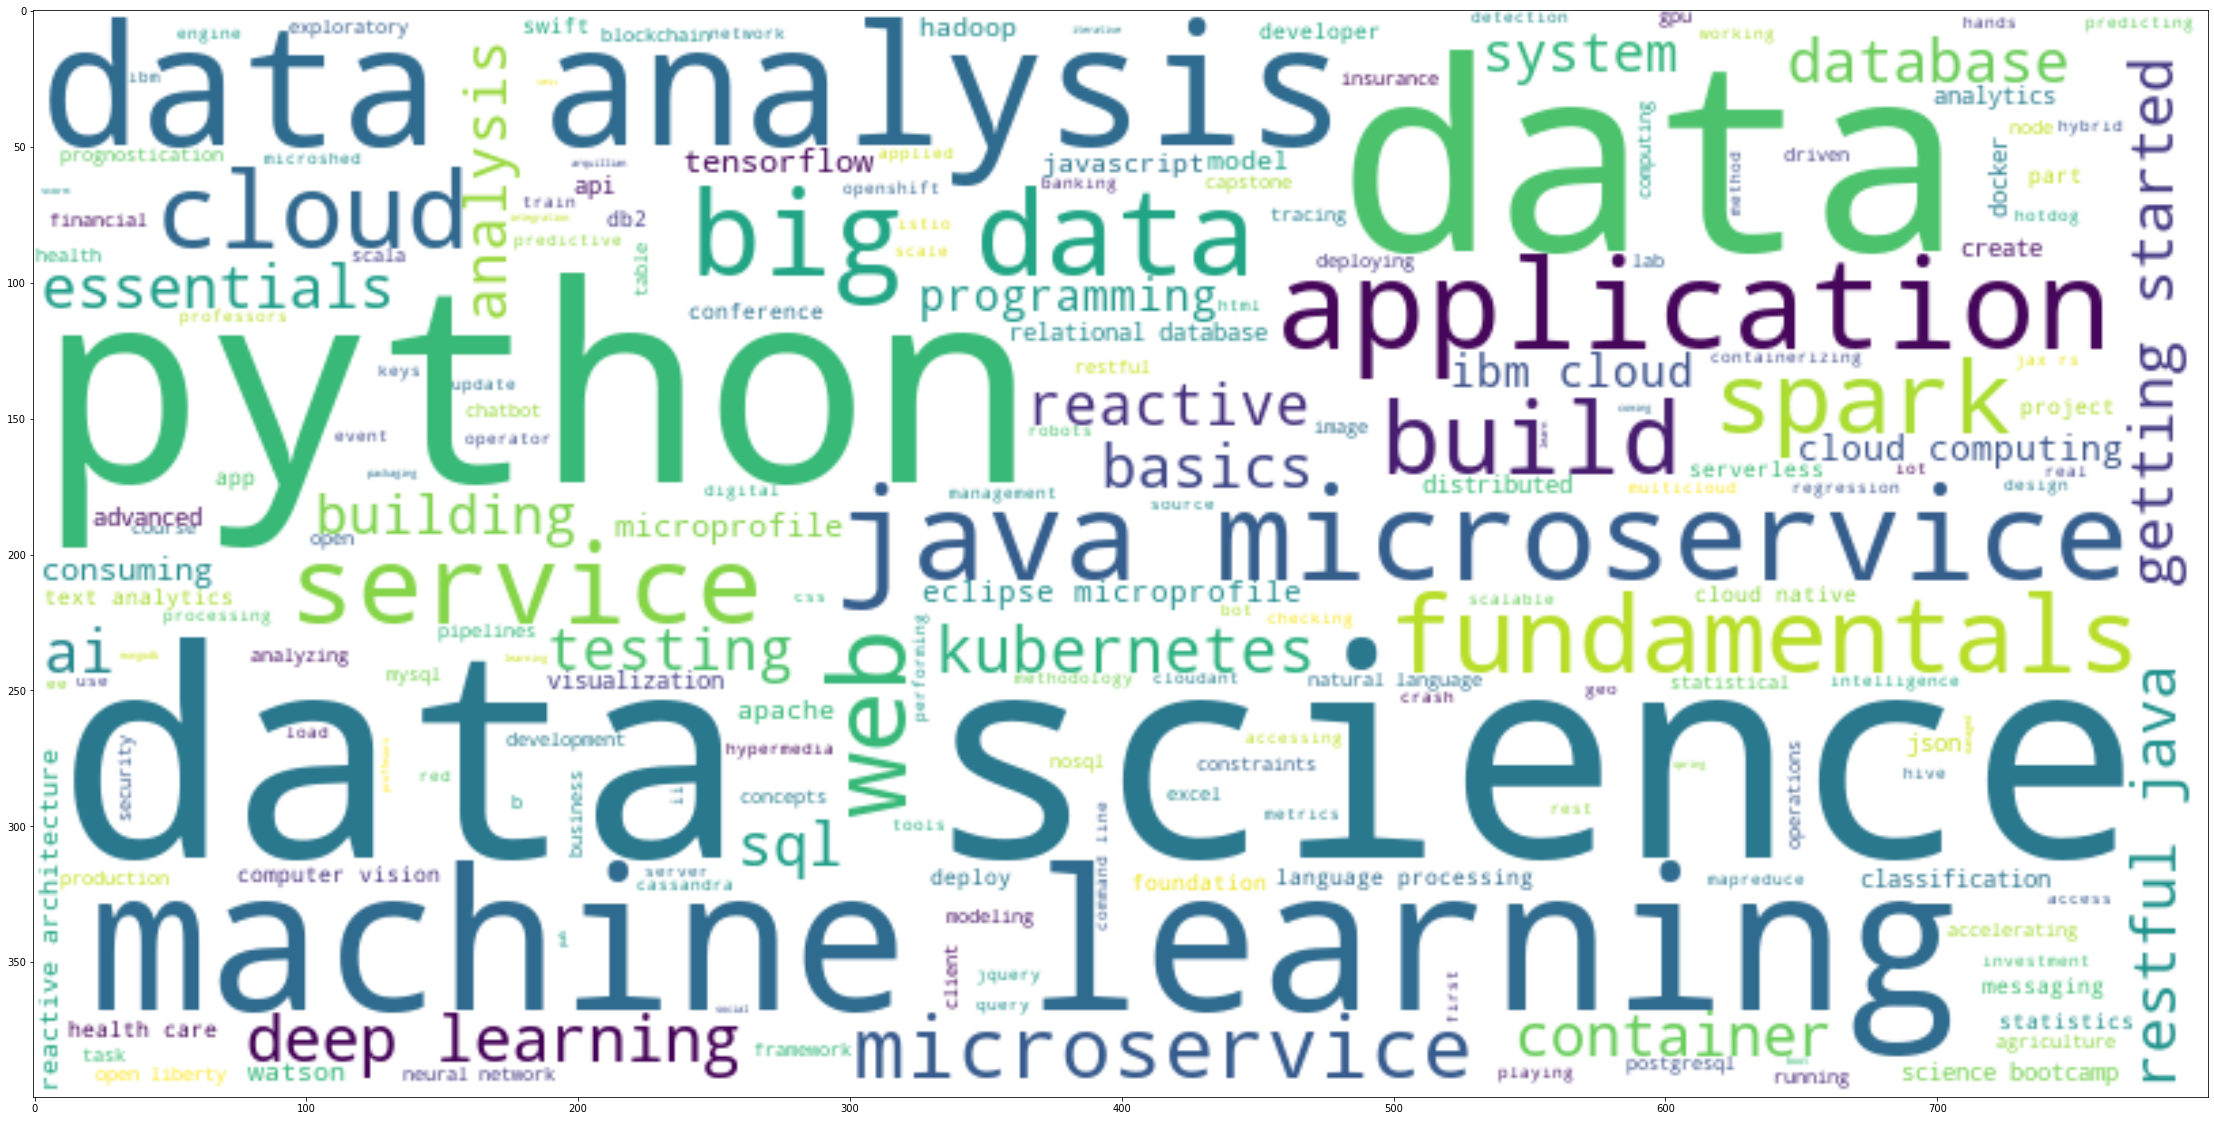

In [85]:
plt.axis("off")
plt.figure(figsize=(40,20))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

As we can see from the `wordcloud`, there are many popular IT related keywords such as python, data scienece, machine learning, big data, ai, tensorflow, container, cloud etc. By looking at thses keywords, we should have a general understanding that the courses in the dataset are focused on demanding IT skills.

### Analyze Course Genres

In [86]:
# Genre MachineLearning
course_df[course_df["MachineLearning"] == 1]

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
15,DAI101EN,data ai essentials,0,0,0,0,0,1,0,0,0,0,0,0,0,0
19,HCC105EN,ybrid cloud conference ai pipelines lab,0,0,0,0,0,1,0,0,0,0,0,0,0,0
21,DS0132EN,data ai jumpstart your journey,0,0,0,0,0,1,0,0,0,0,0,0,0,0
24,BENTEST4,ai for everyone master the basics,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,excourse61,convolutional neural networks in tensorflow,0,0,0,0,0,1,1,0,0,0,0,0,0,0
282,excourse69,machine learning with big data,0,0,0,0,0,1,0,0,1,0,0,0,0,0
290,excourse77,natural language processing with attention models,0,0,0,0,0,1,0,0,0,0,0,0,0,0
291,excourse78,natural language processing with sequence models,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [87]:
# MachineLearning and BigData
course_df[(course_df["MachineLearning"]) & (course_df["BigData"] == 1)]

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
46,GPXX0BUBEN,insurance risk assessment with montecarlo meth...,0,0,0,0,0,1,0,0,1,0,0,0,0,0
59,TA0106EN,text analytics at scale,0,0,0,0,0,1,0,1,1,0,0,0,0,0
184,BD0221EN,spark mllib,0,0,0,0,0,1,0,0,1,0,0,0,0,0
282,excourse69,machine learning with big data,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [88]:
genres = course_df.columns[2:]
genres

Index(['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers',
       'MachineLearning', 'ComputerVision', 'DataScience', 'BigData',
       'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')

Given all the courses genres, now let's calculate the course count for each genre and sort the genre count list to find the most popular course genres.

In [89]:
count = {}
for genre in genres:
  count[genre] = len(course_df[course_df[genre] == 1])

In [90]:
sorted(count.items(), key=lambda x:x[1])

[('Chatbot', 4),
 ('Blockchain', 4),
 ('ComputerVision', 10),
 ('Containers', 17),
 ('R', 17),
 ('FrontendDev', 19),
 ('Python', 28),
 ('BigData', 36),
 ('CloudComputing', 37),
 ('DataScience', 38),
 ('DataAnalysis', 56),
 ('Database', 60),
 ('MachineLearning', 69),
 ('BackendDev', 78)]

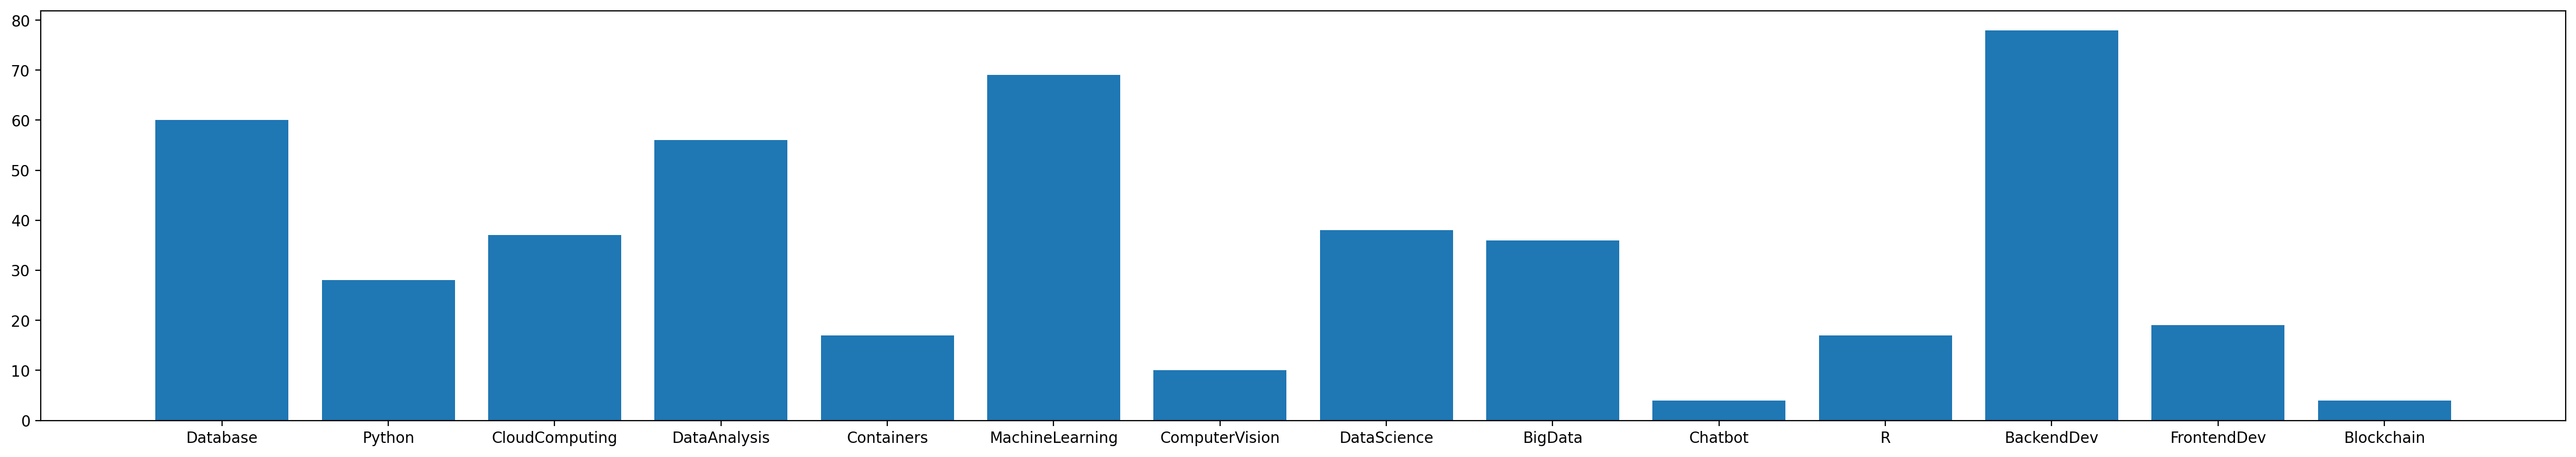

In [91]:
courses = list(count.keys())
values = list(count.values())

plt.figure(figsize=(30,5),dpi=200)
plt.bar(range(len(count)),values, tick_label=courses)
plt.show()

## Analyze Course Enrollments

In [92]:
ratings_df.head()

,user,item,rating
0,1889878,CC0101EN,3.0
1,1342067,CL0101EN,3.0
2,1990814,ML0120ENv3,3.0
3,380098,BD0211EN,3.0
4,779563,DS0101EN,3.0


This dataset contains three columns, user representing a unique user id, item representing a course id, and rating representing a course enrollment mode.

In an online learning scenario, we have learners or students as users who enrolled courses. In fact, to follow the standard recommender system naming convention, we call each learner as a `user`, each course an `item`, and the enrollment mode or interaction as `rating`. So that's why we have columns named `user, item` and `rating` instead of using `learner`, `course` and `enrollment`

In [93]:
ratings_df["rating"].unique()

array([3., 2.])

`2` means the user just audited the course without completing it and `3` means the user completed the course and earned a certificate.

In [94]:
ratings_df.shape[0]

233306

We have 233306 enrollments. In fact, each user is likely to interact with multiple items so let's find the rating counts for each user:

In [95]:
user_report=ratings_df.groupby("user").rating.agg(["count"])
user_report.head()

,count
user,
2,61
4,44
5,59
7,1
8,3


In [96]:
user_report.size

33901

In [97]:
user_report.describe()

,count
count,33901.000000
mean,6.881980
std,5.823548
min,1.000000
25%,2.000000
50%,6.000000
75%,9.000000
max,61.000000


We can also get a histogram showing the enrollments distributions, e.g., how many users rated just 1 item or how many rated 10 items, etc.

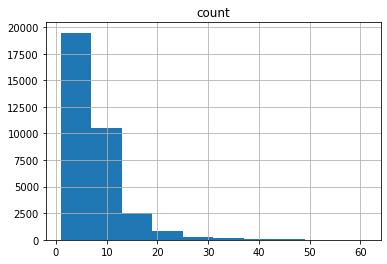

In [98]:
user_report.hist(bins=10);

### Top-20 Most Popular Courses

Let's see the most popular 20 courses i.e items with the most rating counts.

In [99]:
ratings_df = ratings_df.rename(columns={"item":"COURSE_ID"})
ratings_df.columns

Index(['user', 'COURSE_ID', 'rating'], dtype='object')

In [100]:
top_20_enrollment = ratings_df.groupby("COURSE_ID").count().nlargest(20,columns=["user"])["rating"]
top_20_enrollment = top_20_enrollment.to_frame()
top_20_enrollment = top_20_enrollment.reset_index()

In [101]:
top_20_enrollment = course_df.merge(top_20_enrollment,how='right')
top_20_enrollment = top_20_enrollment[["TITLE","rating"]]
top_20_enrollment.rename(columns={"rating":"enrolls"},inplace = True)
top_20_enrollment

,TITLE,enrolls
0,python for data science,14936
1,introduction to data science,14477
2,big data 101,13291
3,hadoop 101,10599
4,data analysis with python,8303
5,data science methodology,7719
6,machine learning with python,7644
7,spark fundamentals i,7551
8,data science hands on with open source tools,7199
9,blockchain essentials,6719


Exact percentage of total enrollments

In [102]:
total = ratings_df.shape[0]
total

233306

In [103]:
top_20_enrollment["percentage_enrollments"] = round((top_20_enrollment["enrolls"] / total ) * 100,2)

In [104]:
top_20_enrollment

,TITLE,enrolls,percentage_enrollments
0,python for data science,14936,6.40
1,introduction to data science,14477,6.21
2,big data 101,13291,5.70
3,hadoop 101,10599,4.54
4,data analysis with python,8303,3.56
5,data science methodology,7719,3.31
6,machine learning with python,7644,3.28
7,spark fundamentals i,7551,3.24
8,data science hands on with open source tools,7199,3.09
9,blockchain essentials,6719,2.88


# Extract Bag of Words (BoW) Features from Course Textual Content

Now we will extract the bag of words (BoW) features from course titles and descriptions. The BoW feature is a simple but effective feature characterization textual data and is widely used in many textual machine learning tasks.

**Objectives**:
* Extract Bag of Words (BoW) features from course titles and descriptions.
* Build a course BoW dataset to be used for building content-based recommender system.

In [105]:
# Install and import required libraries
!pip install nltk
!pip install genism
nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement genism (from versions: none)
ERROR: No matching distribution found for genism


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [106]:
import gensim
import nltk as nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora

In [107]:
# Download stopwords
nltk.download("punkt")
nltk.download("stopword")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading stopword: Package 'stopword' not found in
[nltk_data]     index
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Bag of Words (BoW) features

BoW features are essentially the counts or frequencies of each word that appears in a text (string).

In [108]:
course_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_processed.csv"
course_content_df = pd.read_csv(course_url)

In [109]:
course_content_df.iloc[0,:]

COURSE_ID                                               ML0201EN
TITLE          robots are coming  build iot apps with watson ...
DESCRIPTION    have fun with iot and learn along the way  if ...
Name: 0, dtype: object

The course content dataset has three columns `COURSE_ID`, `TITLE`, and `DESCRIPTION`. `TITLE` and `DESCRIPTION` are all text upon which we want want to extract BoW features.

In [110]:
# Merge TITLE and DESCRIPTION title
course_content_df["course_texts"] = course_content_df[["TITLE", "DESCRIPTION"]].agg(' '.join, axis=1)

course_content_df = course_content_df.reset_index()

course_content_df['index'] = course_content_df.index

In [111]:
course_content_df.iloc[0, :]

index                                                           0
COURSE_ID                                                ML0201EN
TITLE           robots are coming  build iot apps with watson ...
DESCRIPTION     have fun with iot and learn along the way  if ...
course_texts    robots are coming  build iot apps with watson ...
Name: 0, dtype: object

In [112]:
# Tokenizing the course_text columns
def tokenize_course(course, keep_only_nouns = True):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(course)
  # Remove English stop words and numbers
  word_tokens = [w for w in word_tokens if (not w.lower() in stop_words) and (not w.isnumeric())]
  # Only keep nouns
  if keep_only_nouns:
    filter_list = ['WDT', 'WP', 'WRB', 'FW', 'IN', 'JJR', 'JJS', 'MD', 'PDT', 'POS', 'PRP', 'RB', 'RBR', 'RBS',
                       'RP']
    tags = nltk.pos_tag(word_tokens)
    word_tokens = [word for word, pos in tags if pos not in filter_list]
  
  return word_tokens

In [113]:
a_course = course_content_df.iloc[0, :]['course_texts']
a_course

'robots are coming  build iot apps with watson  swift  and node red have fun with iot and learn along the way  if you re a swift developer and want to learn more about iot and watson ai services in the cloud  raspberry pi   and node red  you ve found the right place  you ll build iot apps to read temperature data  take pictures with a raspcam  use ai to recognize the objects in those pictures  and program an irobot create 2 robot  '

In [114]:
tokenize_course(a_course)

['robots',
 'coming',
 'build',
 'iot',
 'apps',
 'watson',
 'swift',
 'red',
 'fun',
 'iot',
 'learn',
 'way',
 'swift',
 'developer',
 'want',
 'learn',
 'iot',
 'watson',
 'ai',
 'services',
 'cloud',
 'raspberry',
 'pi',
 'node',
 'red',
 'found',
 'place',
 'build',
 'iot',
 'apps',
 'read',
 'temperature',
 'data',
 'take',
 'pictures',
 'raspcam',
 'use',
 'ai',
 'recognize',
 'objects',
 'pictures',
 'program',
 'irobot',
 'create',
 'robot']

In [115]:
course_text_tokens = course_content_df["course_texts"].apply(tokenize_course)

In [116]:
course_content_df.head()

,index,COURSE_ID,TITLE,DESCRIPTION,course_texts
0,0,ML0201EN,robots are coming build iot apps with watson ...,have fun with iot and learn along the way if ...,robots are coming build iot apps with watson ...
1,1,ML0122EN,accelerating deep learning with gpu,training complex deep learning models with lar...,accelerating deep learning with gpu training c...
2,2,GPXX0ZG0EN,consuming restful services using the reactive ...,learn how to use a reactive jax rs client to a...,consuming restful services using the reactive ...
3,3,RP0105EN,analyzing big data in r using apache spark,apache spark is a popular cluster computing fr...,analyzing big data in r using apache spark apa...
4,4,GPXX0Z2PEN,containerizing packaging and running a sprin...,learn how to containerize package and run a ...,containerizing packaging and running a sprin...


In [117]:
# Create a token dictionary for the course_tokens
token_dicts = gensim.corpora.Dictionary(course_text_tokens)

In [118]:
print(token_dicts.token2id)

{'ai': 0, 'apps': 1, 'build': 2, 'cloud': 3, 'coming': 4, 'create': 5, 'data': 6, 'developer': 7, 'found': 8, 'fun': 9, 'iot': 10, 'irobot': 11, 'learn': 12, 'node': 13, 'objects': 14, 'pi': 15, 'pictures': 16, 'place': 17, 'program': 18, 'raspberry': 19, 'raspcam': 20, 'read': 21, 'recognize': 22, 'red': 23, 'robot': 24, 'robots': 25, 'services': 26, 'swift': 27, 'take': 28, 'temperature': 29, 'use': 30, 'want': 31, 'watson': 32, 'way': 33, 'accelerate': 34, 'accelerated': 35, 'accelerating': 36, 'analyze': 37, 'based': 38, 'benefit': 39, 'caffe': 40, 'case': 41, 'chips': 42, 'classification': 43, 'comfortable': 44, 'complex': 45, 'computations': 46, 'convolutional': 47, 'course': 48, 'datasets': 49, 'deep': 50, 'dependencies': 51, 'deploy': 52, 'designed': 53, 'feel': 54, 'google': 55, 'gpu': 56, 'hardware': 57, 'house': 58, 'ibm': 59, 'images': 60, 'including': 61, 'inference': 62, 'large': 63, 'learning': 64, 'libraries': 65, 'machine': 66, 'models': 67, 'need': 68, 'needs': 69, 'n

In [119]:
courses_bow = [token_dicts.doc2bow(course) for course in course_text_tokens ]

Lastly, we now need to append the BoW features for each course into a new BoW dataframe. The new dataframe needs to include the following columns:
* 'doc_index': the course index starting from 0
* 'doc_id': the actual course id
* 'token': the tokens for each course
* 'bow': the bow value for each token

In [142]:
course_indices = course_content_df["COURSE_ID"].values

In [153]:
doc_indices = []
doc_ids = []
tokens = []
bow_values = []
new_df = {"doc_index":doc_indices, 
          "doc_id": doc_ids,
          "token":tokens,
          "bow":bow_values}
for doc_index, course_bow in enumerate(courses_bow):
  for token_index, token_bow in course_bow:
    doc_indices.append(doc_index)
    doc_ids.append(course_indices[doc_index])
    token = token_dicts.get(token_index)
    tokens.append(token)
    bow_values.append(token_bow)

In [155]:
bow_dicts = pd.DataFrame(new_df)
bow_dicts.head()

,doc_index,doc_id,token,bow
0,0,ML0201EN,ai,2
1,0,ML0201EN,apps,2
2,0,ML0201EN,build,2
3,0,ML0201EN,cloud,1
4,0,ML0201EN,coming,1


We can also also extract the textual features from the other features like:
* tf-idf: it referes to Term Frequency- Inverse Document Frequency. Similar to BoW, the tf-idf also counts the word frequencies in each document. Furthermore, tf-idf will offset the number of documents in the corpus thta contain the word in order to adjust for the fact that some words appear more frequently in general. The higher the tf-idf normally means the greater the importance the word/token is.


* Text Embedding Vector: Embedding means projecting an object into a latent feature space. We normally employ neural networks or deep neural networks to learn the latent features of a textual object such as a word, a sentence, or the entire document. The learned latent feature vectors will be used to represent the original textual entities.